# Module 3 - Radioactive Decay

## Goals
Use recursive algorithms to solve the simple differential equation that governs radioactive decay over time.

## Radioactive decay - continuous model

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/79/Alpha_Decay.svg/500px-Alpha_Decay.svg.png" width=400px>

We want to analyze the radioactive decay of some sample where there are $N(t)$ atoms at some time $t$.  The continuous behavior of $N(t)$, as $N(t) \rightarrow \infty$ and $\Delta t \rightarrow 0$, is governed by the differential equation:

\begin{equation}
\frac{dN}{dt} = -\frac{N}{\tau}
\tag{1}
\end{equation}

where $\tau$ is the time constant of the decay (inverse of the decay rate, $\lambda$). The solution to this first order differential equation (ODE) can be found by separation of variables and integration:

\begin{align}
\int_{N(0)}^{N(t)} \frac{dN}{N} &= - \int_0^t \frac{dt}{\tau} \\
\log\frac{N(t)}{N(0)} &= -\frac{t}{\tau} \\
N(t) &= N(0) \mathrm{e}^{-t/\tau}
\end{align}

### Further reading
* Chapter 1 - Giordano
* Chapter 4.5 - Landau (optional)
<!--
http://physics.oregonstate.edu/~landaur/Books/CPbook/eBook/Notebooks/HTML/CP04.html#4.5 (html notebook)
http://physics.oregonstate.edu/~landaur/Books/CPbook/eBook/Notebooks/CP04.ipynb (IPython notebook)
-->

### Plot $N(t)/N(0)$ vs. $t/\tau$

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database',)).History will not be written to the database.


<IPython.core.display.Javascript object>


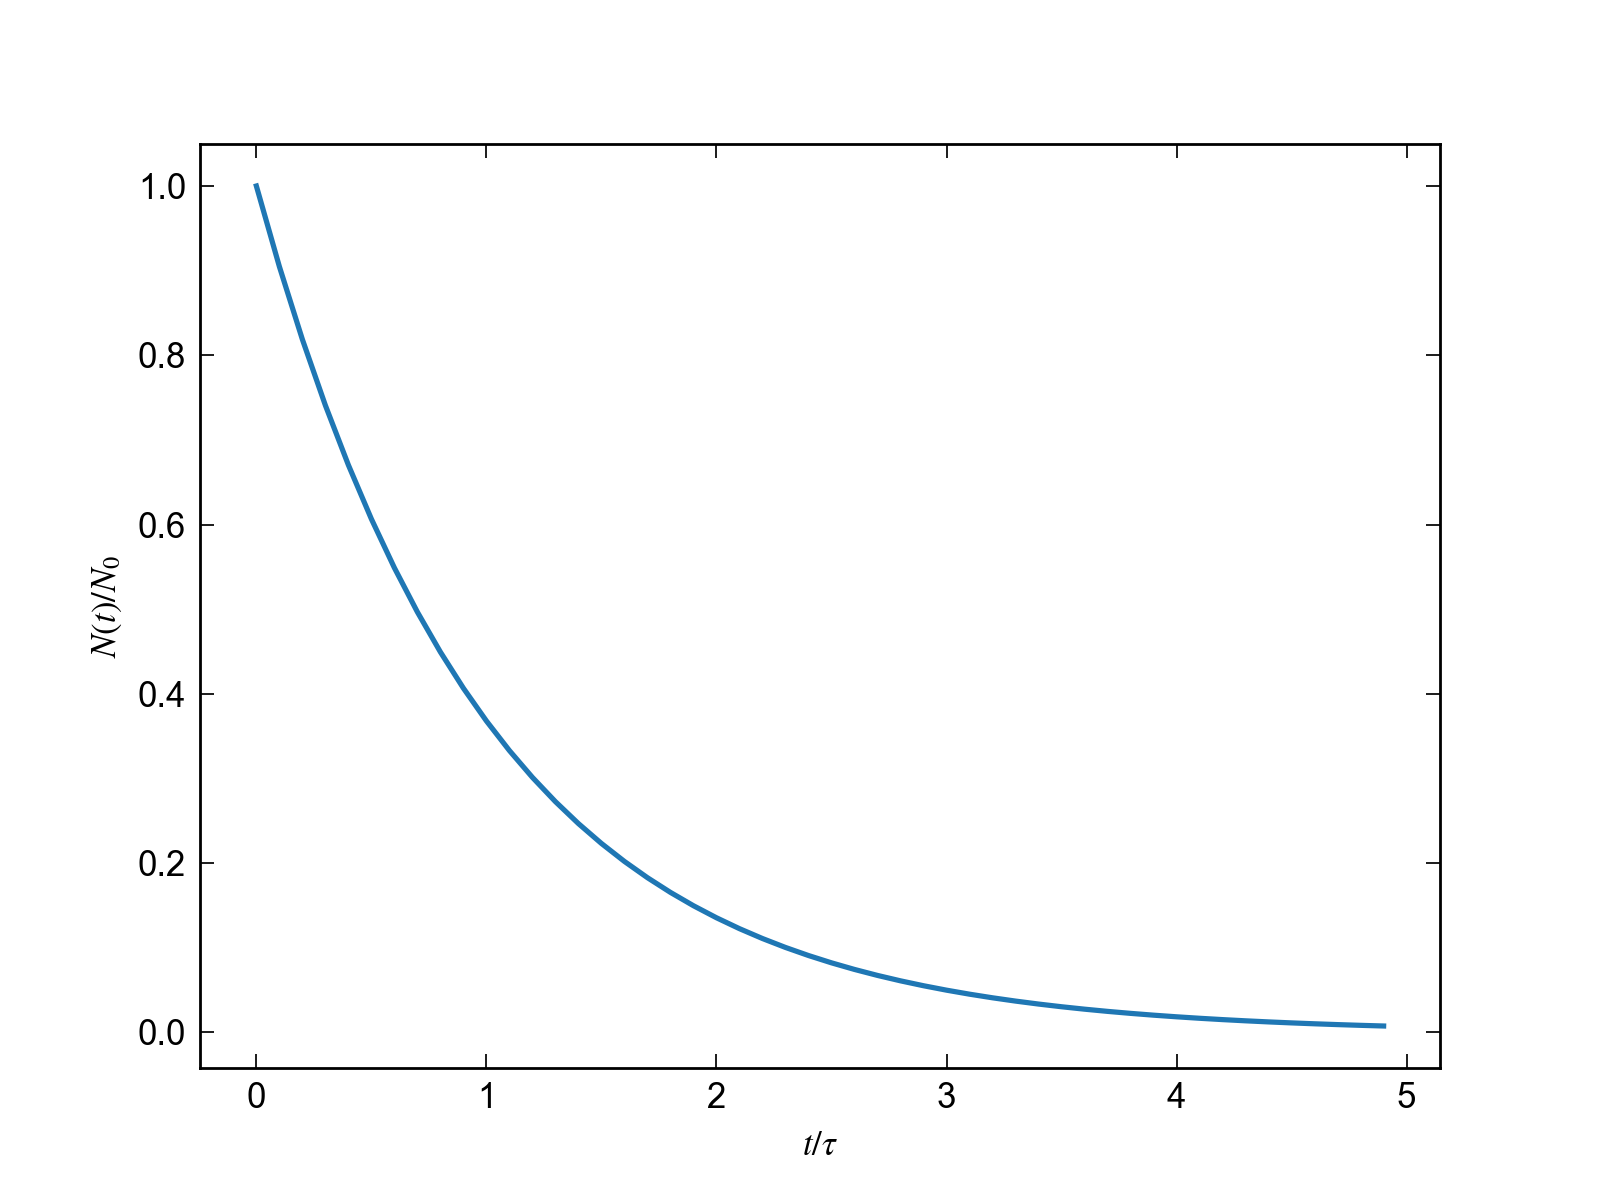

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

t = np.arange(0,5,0.1)
plt.plot(t,np.exp(-t))
plt.ylabel(r'$N(t)/N_0$')
plt.xlabel(r'$t/\tau$')

### Fiestaware!!

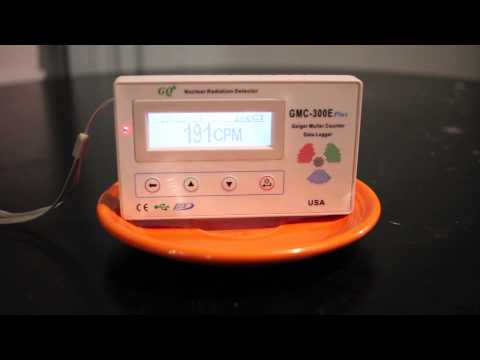

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('vTFviQbY6Vk', width=600, height=400)

## A Numerical Approach for the continuous decay model (Giordano Ch. 1)

### Question: How do find a discretized solution to the ODE?

#### Forward derivative - finite difference equation from Taylor expansion

We can discretely solve a generic differential equation of the form

\begin{equation}
\frac{df}{dt}=g(t,f)
\end{equation}

using the method of finite differences. Starting with the Taylor expansion of any function around a known point $t$, 

\begin{equation}
f(t+\Delta t) = f(t) + \frac{df}{dt}\Delta t + \frac{1}{2} \frac{d^2 f}{dt^2} \Delta t^2 + \mathrm{O}\left(\Delta t^3\right),
\end{equation}

we can write a finite diference equation to approximate the first derivative of our function assuming that $\Delta t \ll 1$:

\begin{equation}
\frac{df(t)}{dt} \approx \frac{f(t+\Delta t) - f(t)}{\Delta t},
\end{equation}

where the error in the derivative is of order $\mathrm{O}\left(\Delta t^2\right)$. This finite difference equation is known as the **forward derivative**.

### Euler's method - Numerical solution to the radioactive decay problem

We can solve the general ODE problem using the forward difference equation as follows 

\begin{align}
\frac{df(t)}{dt} &= g(t,f) \\
\frac{f(t+\Delta t) - f(t)}{\Delta t} &= g(t,f) \\
f(t+\Delta t) &\approx f(t) + g(t,f)\Delta t.
\end{align}

This is known as **Euler's method** (see Appendix A of Giordano and Nakanishi). Using the discrete notation, $t_n = n\Delta t$ and $f_n=f(t_n)$, our iterative equation becomes

\begin{equation}
f_{n+1} \approx f_n + g_n\Delta t.
\end{equation}

While the error in the derivative was of order $\mathrm{O}\left(\Delta t^2\right)$, the error in our iterative solution to the ODE is of order $\mathrm{O}\left(\Delta t\right)$. We can apply Euler's method above to solve the radioactive decay problem

\begin{align}
\frac{dN(t)}{dt} & = -\frac{N}{\tau} \\
\Rightarrow \frac{N(t+\Delta t) - N(t)}{\Delta t} &\approx -\frac{N(t)}{\tau} \\
N(t+\Delta t) &\approx \left(1-\frac{\Delta t}{\tau}\right)N(t) \\
N_{n+1} &\approx \left(1-\frac{\Delta t}{\tau}\right)N_n.
\end{align}  

<div class="span alert alert-success">
<h2> Programming challenge </h2>
<br/>
Use Euler's method to solve the radioactive decay continuous equation. Euler's method prescribes a well defined way for finding an approximate solution to our unknown function at a later time $t+\Delta t$ based on the current value of the function. Starting with a known initial value of $N(t=0)$, use a `for` loop to find a solution up to some maximum time $t_{\mathrm{max}}$. Start with values of $dt = 0.05$, $\tau=1.0$, $N_0=1.0$ and $t_{\mathrm{max}}=5.0$. You will need two arrays for storage: one for the solution and second one for the corresponding times. Create a plot that compares your numerical result to the analytical solution $N(t) = N(0) \mathrm{e}^{-t/\tau}$. Plot $\frac{N(t)}{N(0)}$ vs $\frac{t}{\tau}$ for easier comparison later on.
</div>

<IPython.core.display.Javascript object>


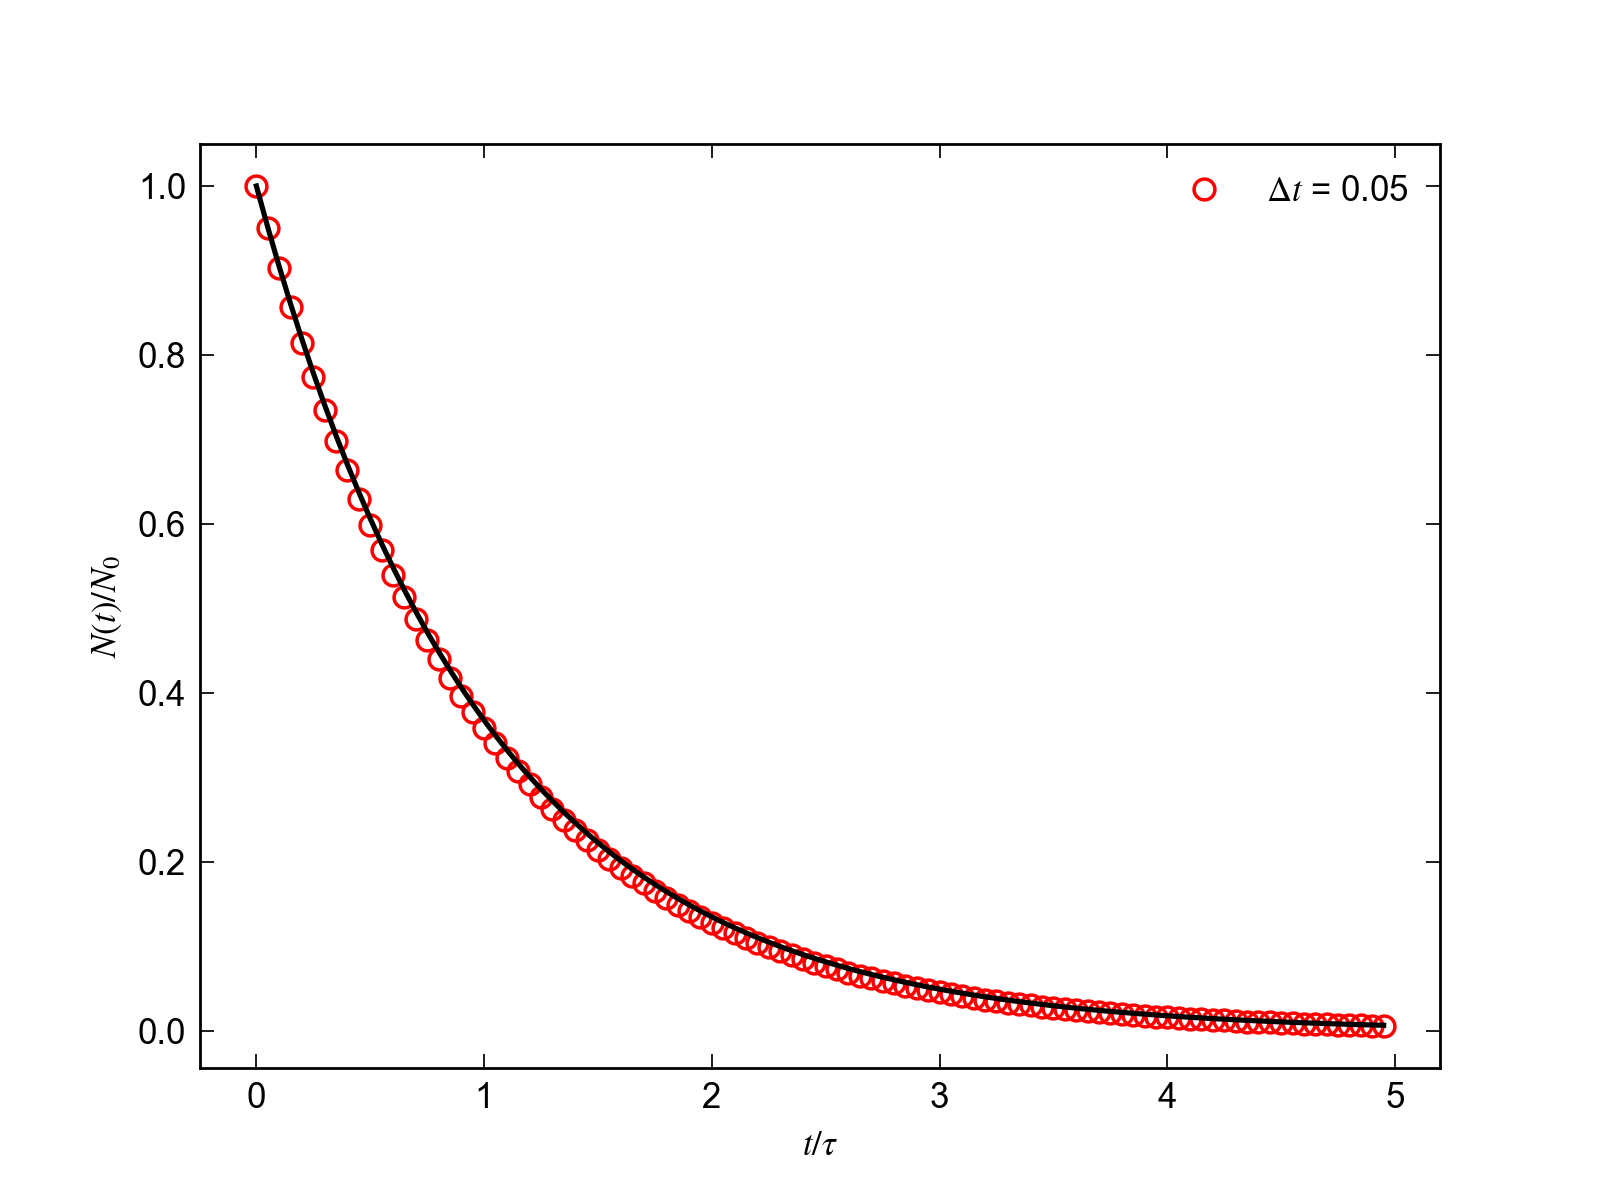

In [3]:
dt = 0.05
tmax = 5
tau = 1.0
N0 = 1.0

## insert code here ##
t = np.arange(0, tmax, dt)
N = N0*np.ones_like(t)

for n in range(len(N)-1):
    N[n+1] = (1 - dt/tau)*N[n]

plt.figure()
plt.plot(t/tau, N/N[0],'o',mfc='None',mec='red',label=r'$\Delta t$ = {0}'.format(dt))
plt.plot(t,np.exp(-t/tau),'k-')
plt.legend()
plt.ylabel(r'$N(t)/N_0$')
plt.xlabel(r'$t/\tau$')
plt.show()

### How does this solution behave for large $\Delta t$?
The error in our numerical solution depends on the choice of $\Delta t$. We can test the accuracy of our solution for various choices.

<div class="span alert alert-success">
<h2> Programming challenge </h2>
<br/>
For simplicity, rewrite the code above as a function, `rad_decay()`, that finds the solution for $N(t)$ given some initial input values such as $N_0$, $\Delta t$, $t_{\mathrm{max}}$, and $\tau$. Use this function in the code below to compare the numerical solutions for given values of $\Delta t=$ 0.05, 0.5, and 1.
</div>

<IPython.core.display.Javascript object>


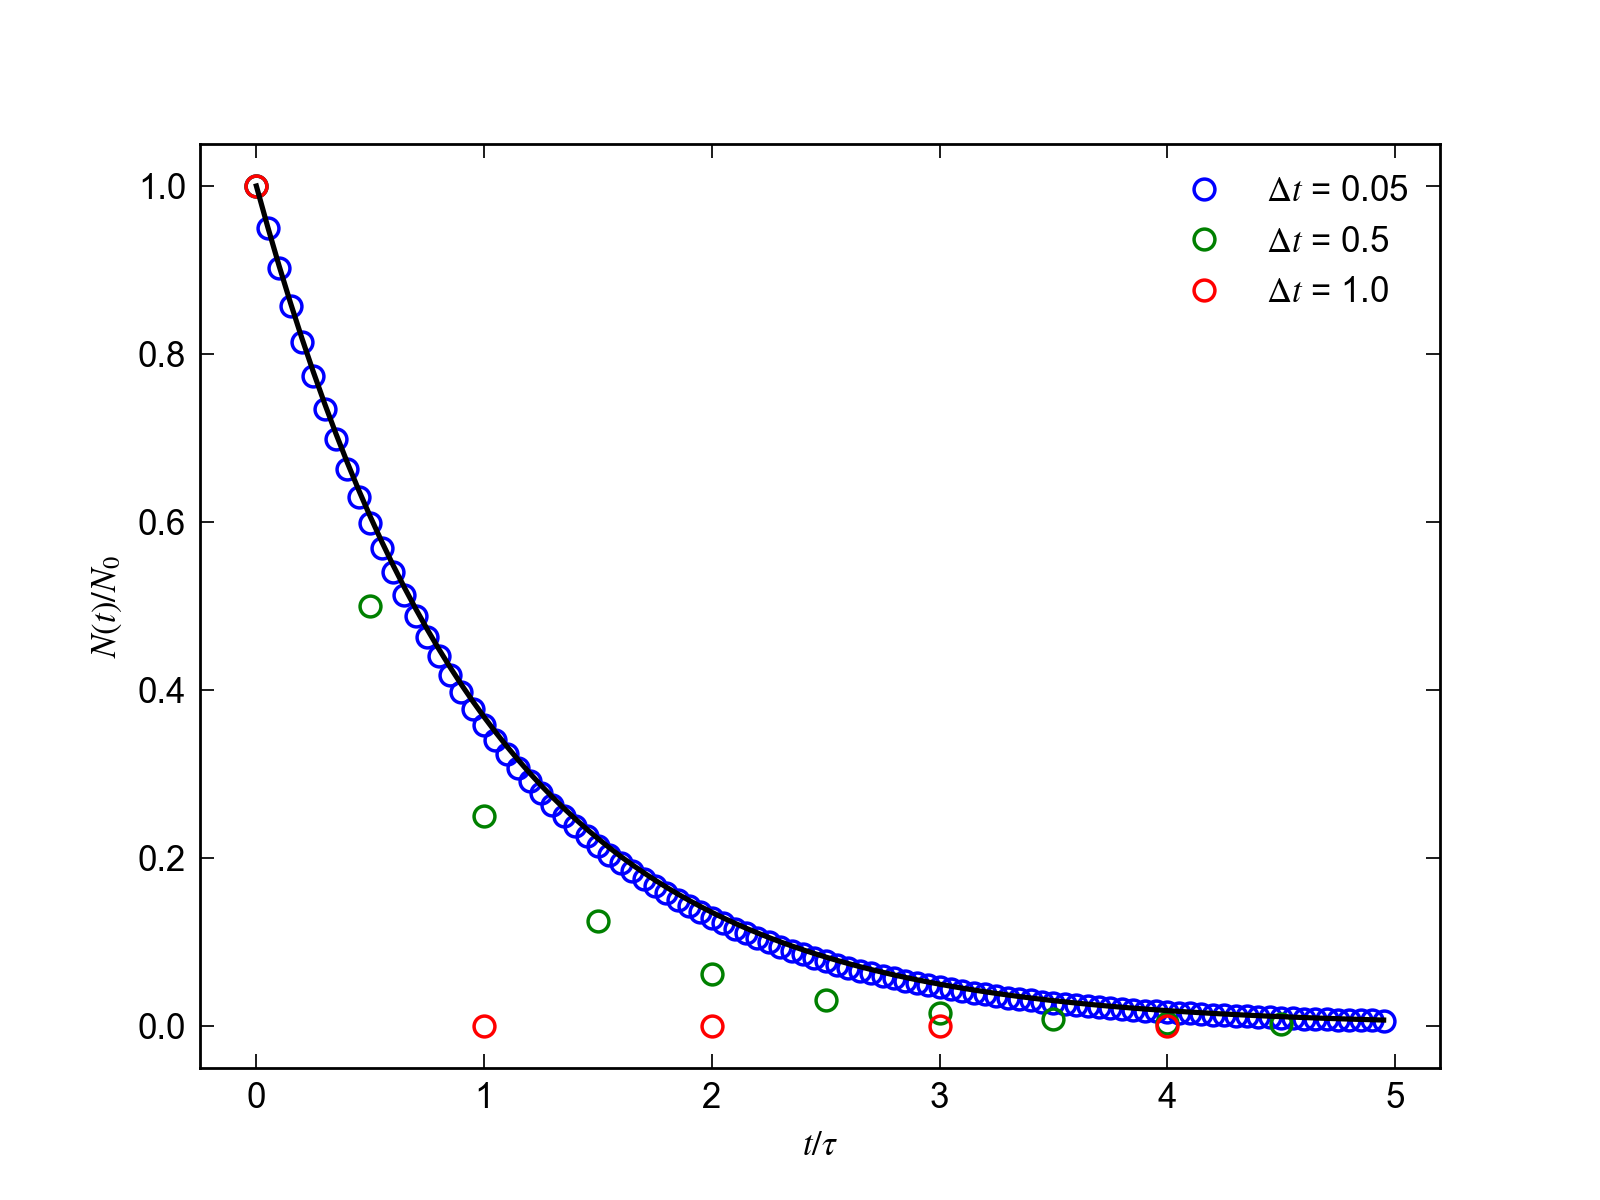

In [4]:
def rad_decay(N0, dt, tmax, tau):
    ## insert code here ##
    t = np.arange(0, tmax, dt)
    N = N0*np.ones_like(t)

    for n in range(len(N)-1):
        N[n+1] = (1 - dt/tau)*N[n]
    
    return t,N

plt.figure()
tmax = 5
colors = ('b', 'g', 'r')                      # tuple with the list of colors to be used in the plot
i = 0
for dt in (0.05, 0.5, 1.0):                   # iterate over tuple of time steps
    t,N = rad_decay(1.0, dt, 5.0, 1.0)
    plt.plot(t/tau, N/N[0],'o',mfc='None',mec=colors[i],label=r'$\Delta t$ = {0}'.format(dt))  
    # used the .format() method to include a numerical value in the string 
    i+=1
t = np.arange(0, tmax, 0.05)
plt.plot(t,np.exp(-t/tau),'k-')
plt.legend()
plt.ylabel(r'$N(t)/N_0$')
plt.xlabel(r'$t/\tau$')
plt.show()

## Radiactive decay - discrete model (Landau Ch. 4.5)
While we previously approximated the spontaneous decay as a continuous process, radiactive decay is inherently discrete. The probability of any one particle decaying per unit time is constant, $P(t) = -\lambda = -\frac{1}{\tau}$. The minus sign indicates that the number of particles decreases over time. The decay rate, $\lambda$, is a physical property of the radioactive material and is often described by the mean lifetime, $\tau$. For a system with $N(t)$ particles at a time $t$, the probability of observing a number of particles, $\Delta N(t)$, decay over a time period, $\Delta t$, is on average given by 

\begin{equation}
    P(t)\Delta t = -\lambda \Delta t = \frac{\Delta N(t)}{N(t)} \Rightarrow \Delta N(t) = - \lambda \Delta t N(t) = - \frac{\Delta t N(t)}{\tau}
\end{equation}



##  A Numerical Approach for the discrete decay model

### Question: How do we simulate probabilistic events?

The probability of observing an event must always be normalized: the sum of the probabilities of all possible outcomes must always equal to 1. We can use a uniformly distributed random number (between 0 and 1, such as those produced by `numpy.random.random()`) to decide wether a decay event takes place given a known decay rate.

<div class="span alert alert-success">
<h2> Programming challenge </h2>
<br/>
Starting with a known decay rate ($\lambda = 1$), time step ($\Delta t = 0.005$), maximum time ($t_{\mathrm{max}}=5$), and initial number of particles, write a code that models the discrete decay process over time. At each time step, you will need to "probe" each particle to determine if it should decay during the given time interval. Assuming we have a random number, $R$, between 0 and 1, you can do this by comparing the value of $R$ to the probability $P(t)\Delta t = \lambda \Delta t$. Keep track of all the particles that decay during a time step, and subtract this from the total number of undecayed particles, $N(t+\Delta t) = N(t) - \Delta N(t)$ or $N_{n+1} = N_n - \Delta N_n$. Continue this process until you have reached the maximum time. You can do this inside a `for` or a `while` loop. Store the total number of undecayed particles at each time step and create a plot of $N(t)/N_0$ vs $\lambda t$ and compare to the analytical exponential solution $N(t)=N_0e^{-\lambda t}$.
</div>

In [5]:
tmax = 5
dt = 0.005
lambda1 = 1.0                  # lambda is a protected python keyword, so we cannot use it as a variable in our code
N0 = 10000

## Insert your code here ##

t = np.arange(0, tmax, dt)     # array of discrete times
N = N0*np.ones_like(t, dtype=np.int64)           # array of number of particles at a given time

for n in range(len(t)-1):      # iterate over all discrete time steps
    nDecay = 0
    for i in range(N[n]):      # iterate over all the un-decayed particles at a given time
        R = np.random.random() # attempt for a single decay event
        if (R < lambda1*dt):   # if attempt is lower than P(t) = lambda*dt, then particle decays
            nDecay +=1
    N[n+1] = N[n] - nDecay

<IPython.core.display.Javascript object>


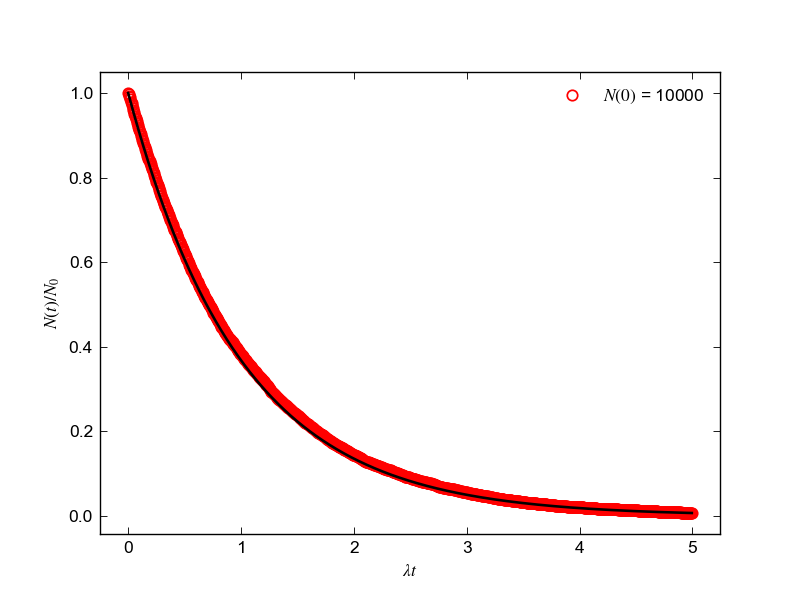

In [6]:
plt.figure()
plt.plot(t*lambda1, N/N[0],'o',mfc='None',mec='red',label=r'$N(0)$ = {0}'.format(N[0]))
plt.plot(t,np.exp(-lambda1*t),'k-')
plt.legend()
plt.ylabel(r'$N(t)/N_0$')
plt.xlabel(r'$\lambda t$')
plt.show()

### What happens for lower numbers of particles?
<div class="span alert alert-success">
<h2> Programming challenge </h2>
<br/>
For simplicity, rewrite the code above for the discrete radioactive decay problem as a function, `rad_decay_discrete()`, that finds the solution for $N(t)$ given some initial input values such as $N_0$, $\Delta t$, $t_{\mathrm{max}}$, and $\lambda$. Use this function in the code below to compare the numerical solutions for given values of $N_0=$ 1000, 100, and 10.
</div>

<IPython.core.display.Javascript object>


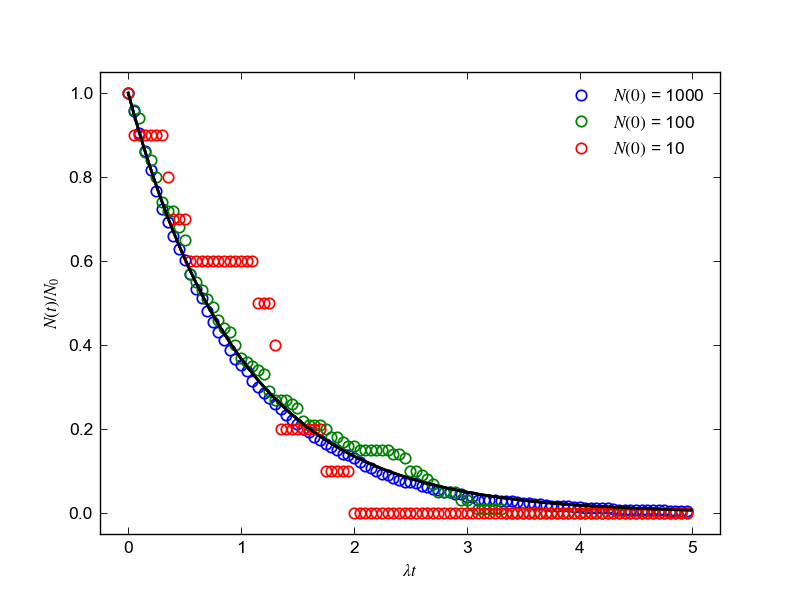

In [7]:
def rad_decay_discrete(N0, dt, tmax, lambda1):
    ## insert code here ##
    t = np.arange(0, tmax, dt)     # array of discrete times
    N = N0*np.ones_like(t, dtype=np.int64)           # array of number of particles at a given time

    for n in range(len(t)-1):      # iterate over all discrete time steps
        nDecay = 0
        for i in range(N[n]):      # iterate over all the un-decayed particles at a given time
            R = np.random.random() # attempt for a single decay event
            if (R < lambda1*dt):   # if attempt is lower than P(t) = lambda*dt, then particle decays
                nDecay +=1
        N[n+1] = N[n] - nDecay
    return t,N

tmax = 5
dt = 0.005
lambda1 = 1.0
plt.figure()
colors = ('b', 'g', 'r')

c = 0
for N0 in (1000, 100, 10):
    t,N = rad_decay_discrete(N0, dt, tmax, lambda1)
    
    plt.plot(t[::10]*lambda1, N[::10]/N[0],'o',mfc='None',mec=colors[c],label=r'$N(0)$ = {0}'.format(N[0]))
    plt.plot(t,np.exp(-lambda1*t),'k-')
    c+=1

plt.legend()
plt.ylabel(r'$N(t)/N_0$')
plt.xlabel(r'$\lambda t$')
plt.show()

You can use radiactive decay to generate true random numbers!!